Convolution d'une fonction porte par elle-même
==============================================
Eléments principaux pour l'exercice 22 (Transformée de Fourier)
--------------------------------------------------------

In [69]:
from IPython.display import display
from sympy import *
from sympy import fourier_transform, Piecewise
from sympy.plotting import plot
from sympy.abc import x,y

#import sys
%config InlineBackend.figure_formats = {'png', 'retina'} # makes nicer graphics
%matplotlib inline

Considérons la fonction $f$

$$ f(x) = 
\begin{cases} 
      0 & x < -T/2 \\
      1 & -T/2\leq x\leq T/2 \\
      0 & x > T/2
\end{cases}
$$

L'illustration prend l'exemple où T=2.

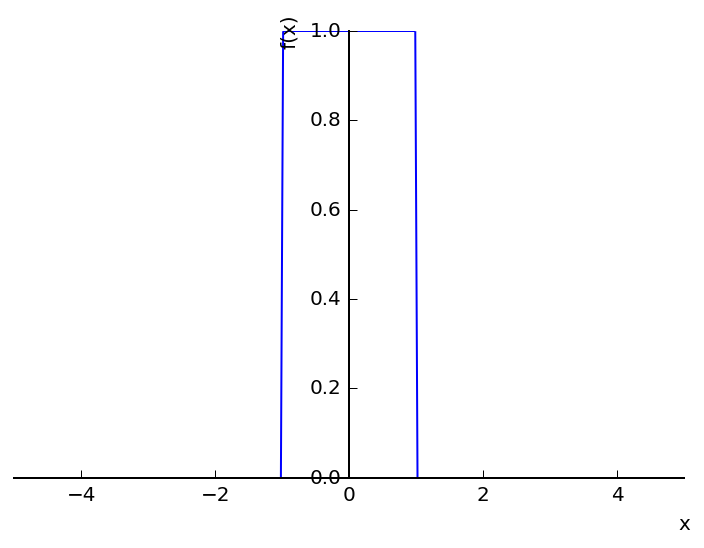

In [70]:
T=2
f = Piecewise ((0,x<-T/2),(1,x<T/2),(0,True)) 
plot(f,(x,-5,5),adaptive=False, num_of_points=20)

Partons de la définition de la convolution : $$f(t)*f(t)=\int^\infty_\infty f(t-x).f(x) dx$$ 

Qu'on peut ré-écrire $$f(t)*f(t)=\int^\infty_\infty f(x-t).f(x) dx$$ car $f$ est paire

L'intégrale ci-dessus se fait sur le produit de la fonction $f$ avec elle-même translatée de $t$. Traçons $f(x-t)$ pour la valeur-exemple t=-1.5 :

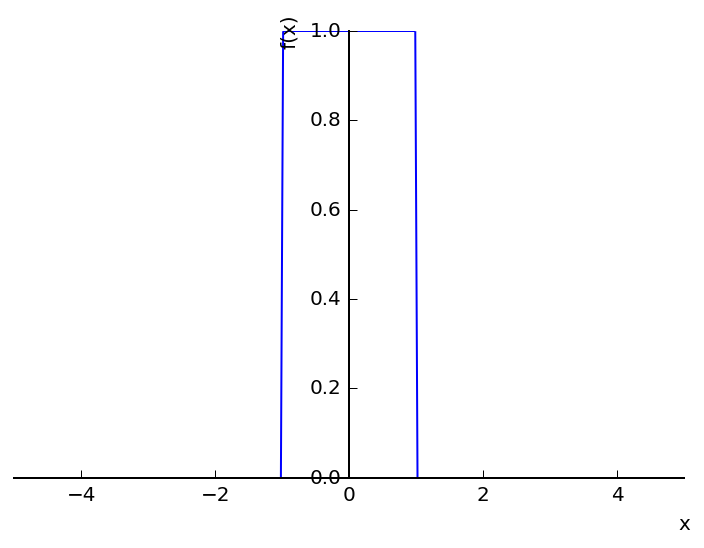

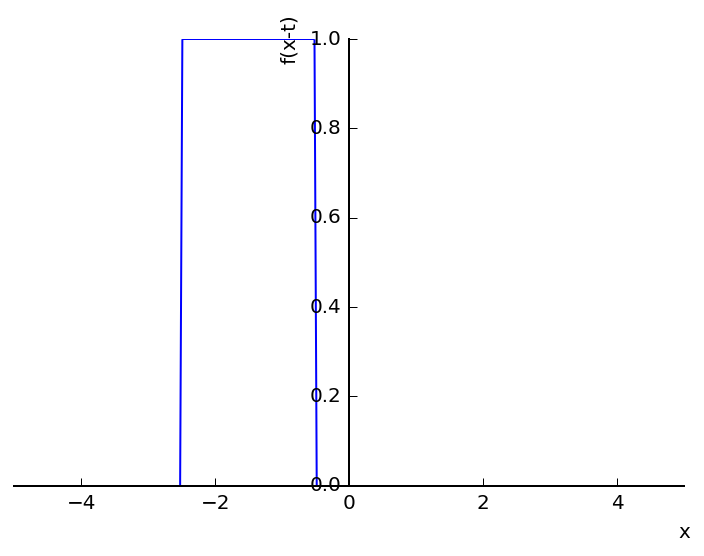

In [71]:
T=2
t=-1.5
g = Piecewise ((0,x<-T/2+t),(1,x<T/2+t),(0,True))
plot(f,(x,-5,5),adaptive=False, num_of_points=20,ylabel='f(x)')
plot(g,(x,-5,5),adaptive=False, num_of_points=20,ylabel='f(x-t)',overlay=True)

Le produit $f(x-t).f(x)$ dans l'intégrale vaut 0 sauf quand $f(x-t)$ et $f(x)$ sont toutes deux non nulles, c'est à dire dans la zone d'intersection entre les deux portes. Il faut alors distinguer 4 cas :

* dans le cas où $t<-T$, les deux portes ont une intersection nulle, donc $\int^\infty_\infty f(x-t).f(x)=0$

* dans le cas où $-T<t<0$, le produit des deux portes vaut 1 dans l'intervalle $[-T/2,T/2+t] (=[-1,-0.5]$ dans notre exemple) et vaut 0 hors de cet intervalle.

 $$\int^\infty_\infty f(x-t).f(x).dx =\int^{T/2+t}_{-T/2} 1.dx=\left[ x \right]^{T/2+t}_{-T/2}=T+t$$

* dans le cas où $0<t<T$, le produit des deux portes vaut 1 dans l'intervalle $[T/2,-T/2+t]$ et vaut 0 hors de cet intervalle.

 $$\int^\infty_\infty f(x-t).f(x).dx =\int_{-T/2+t}^{T/2} 1.dx=\left[ x \right]_{-T/2+t}^{T/2}=T-t$$

* dans le cas où $t>T$, les deux portes ont une intersection nulle, donc $\int^\infty_\infty f(x-t).f(x)=0$

Traçons la courbe correspondante :

In [72]:
resultat = Piecewise ((0,x<-T),(T+x,x<0),(T-x,x<T),(0,True)) 

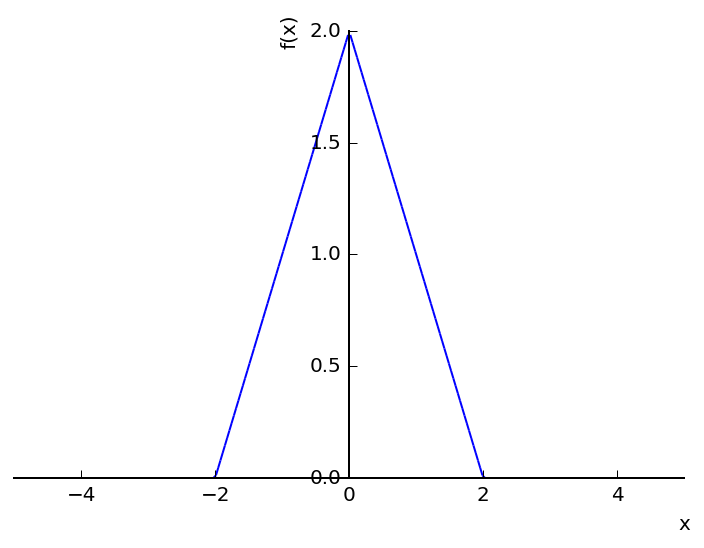

In [73]:
plot(resultat,(x,-5,5),adaptive=False, num_of_points=20)

Pourquoi avoir montré ça ?
--------------------------

Avoir montré que $f(t)*f(t)$ prend la forme de ce triangle permet une manière simple de calculer la transformée de Fourier de ce triangle (ou d'autres triangles dont la hauteur ou la largeur diffèrent, tant que la parité est préservée), en utilisant 

$$F( f(t)*f(t) )=F( f(t) ).F( f(t) )$$

Avec ces éléments, il ne vous reste plus que des ajustements mineurs pour faire l'exercice 22 : mettre les bonnes constantes multiplicatives où c'est nécessaire, faire attention à la largeur du triangle par rapport à la largeur de la porte. 